In [3]:
#converting column into data time
import pandas as pd
#sample data
data = {
    'date': ['2021-01-01', '2021-01-02', '2021-01-03'],
    'sales': [100, 105, 102]
}
df=pd.DataFrame(data)
#convert date column to datetime
df['date']=pd.to_datetime(df['date'])
print(df)

        date  sales
0 2021-01-01    100
1 2021-01-02    105
2 2021-01-03    102


In [5]:
#setting date time index
#set 'date' column as index
df.set_index('date',inplace=True)
print(df)

            sales
date             
2021-01-01    100
2021-01-02    105
2021-01-03    102


In [15]:
#handling multiple time zones
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
# Sample data with datetime index
data = {
    'date': ['2021-01-01 10:00', '2021-01-02 11:00', '2021-01-03 12:00'],
    'sales': [100, 105, 102]
}
df=pd.DataFrame(data)
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
#localize to a specific time zone(UT)
df=df.tz_localize('UTC')
print(df)


                           sales
date                            
2021-01-01 10:00:00+00:00    100
2021-01-02 11:00:00+00:00    105
2021-01-03 12:00:00+00:00    102


In [17]:
df=df.tz_convert('US/Eastern')
print(df)

                           sales
date                            
2021-01-01 05:00:00-05:00    100
2021-01-02 06:00:00-05:00    105
2021-01-03 07:00:00-05:00    102


In [19]:
#generating custom date/time frequencies
#creating a custom date range
date_range=pd.date_range(start='2021-01-01', end='2021-01-10', freq='D')
print(date_range)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10'],
              dtype='datetime64[ns]', freq='D')


In [27]:
#generate a range of date with custom frequency
custom_date_range = pd.date_range(start='2021-01-01', periods=5, freq='2D')
print(custom_date_range)

DatetimeIndex(['2021-01-01', '2021-01-03', '2021-01-05', '2021-01-07',
               '2021-01-09'],
              dtype='datetime64[ns]', freq='2D')


In [40]:
#resample
#set up and sample data creation
import pandas as pd
import numpy as np
#create a date range with hourly frequency
date_rng = pd.date_range(start='2023-01-01', end='2023-01-08', freq='h')

#generate random temerature data between 15 and 25 degree celsious
np.random.seed(42) #For reproducibility
temperature=np.random.uniform(low=15,high=25,size=(len(date_range)))

#create a dataframe with the generate date
df=pd.DataFrame(date_range,columns=['date'])
df['temperature']=temperature
df.set_index('date',inplace=True)
#display the first few rows of the data
print('original hourly data:')
print(df.head(10))
print('\n')


original hourly data:
            temperature
date                   
2021-01-01    18.745401
2021-01-02    24.507143
2021-01-03    22.319939
2021-01-04    20.986585
2021-01-05    16.560186
2021-01-06    16.559945
2021-01-07    15.580836
2021-01-08    23.661761
2021-01-09    21.011150
2021-01-10    22.080726




In [46]:
#example of donwsampling
#create a sample data
import pandas as pd
import numpy as np
#create a date range with hourly frequency.
date_rng = pd.date_range(start='2023-01-01', end='2023-01-08', freq='h')
#generate random sale data
np.random.seed(42)
sales=np.random.randint(100,500,size=(len(date_rng)))

#create a datafram
df=pd.DataFrame(date_rng,columns=['date'])
df['sales']=sales
df.set_index('date',inplace=True)
#display the few rows of the dataframe
print('original hourly sales data')
print(df.head(10))
print('\n')

original hourly sales data
                     sales
date                      
2023-01-01 00:00:00    202
2023-01-01 01:00:00    448
2023-01-01 02:00:00    370
2023-01-01 03:00:00    206
2023-01-01 04:00:00    171
2023-01-01 05:00:00    288
2023-01-01 06:00:00    120
2023-01-01 07:00:00    202
2023-01-01 08:00:00    221
2023-01-01 09:00:00    314




In [48]:
#downsampling to daily data
#downsampling to daily  frequency ,calculating the total sales for each day
daily_sales=df.resample('D').sum()
#display the daily sales data
print('downsampled daiily sales data(total sales)')
print(daily_sales)


downsampled daiily sales data(total sales)
            sales
date             
2023-01-01   7396
2023-01-02   7043
2023-01-03   7545
2023-01-04   7931
2023-01-05   7104
2023-01-06   6819
2023-01-07   6886
2023-01-08    426


In [52]:
#additional aggregation method
#mean sales
daily_mean_sales=df.resample('D').mean()
print('downsampling daily sales(mean sales)')
print(daily_mean_sales)

downsampling daily sales(mean sales)
                 sales
date                  
2023-01-01  308.166667
2023-01-02  293.458333
2023-01-03  314.375000
2023-01-04  330.458333
2023-01-05  296.000000
2023-01-06  284.125000
2023-01-07  286.916667
2023-01-08  426.000000


daily_min_sales=df.resample('D').min()
print('downsampling daily sales (min sales)')
print(daily_min_sales)

In [56]:
#daily max sales
daily_max_sales=df.resample('D').max()
print('downsampling daily sale(max sales)')
print(daily_max_sales)

downsampling daily sale(max sales)
            sales
date             
2023-01-01    485
2023-01-02    463
2023-01-03    489
2023-01-04    466
2023-01-05    491
2023-01-06    497
2023-01-07    492
2023-01-08    426


In [70]:
import pandas as pd
import numpy as np

# Create a date range with daily frequency
date_range = pd.date_range(start='2023-01-01', end='2023-01-07', freq='D')

# Generate random sales values
np.random.seed(42)
sales = np.random.randint(1000, 5000, size=(len(date_range)))

# Create a DataFrame
df = pd.DataFrame(date_range, columns=['date'])
df['sales'] = sales
df.set_index('date', inplace=True)

# Display the first few rows of the DataFrame
print('Original daily sales data:')
print(df)
print('\n')


Original daily sales data:
            sales
date             
2023-01-01   4174
2023-01-02   4507
2023-01-03   1860
2023-01-04   2294
2023-01-05   2130
2023-01-06   2095
2023-01-07   4772




In [80]:
#Upsample to hourly frequency
hourly_sales=df.resample('h').mean()
#interpolate the missing  values for upsampling
hourly_sales_interpolated=hourly_sales.interpolate(method='linear')

#display the first few ros of the interpolated hourly sales data
print('upsample data(hourly intervals with interpolation)')
print(hourly_sales_interpolated.head(10))


# Display the last few rows to see interpolation at the end of the period
print("Upsampled Data - Last Few Rows:")
print(hourly_sales_interpolated.tail(10))
      

upsample data(hourly intervals with interpolation)
                        sales
date                         
2023-01-01 00:00:00  4174.000
2023-01-01 01:00:00  4187.875
2023-01-01 02:00:00  4201.750
2023-01-01 03:00:00  4215.625
2023-01-01 04:00:00  4229.500
2023-01-01 05:00:00  4243.375
2023-01-01 06:00:00  4257.250
2023-01-01 07:00:00  4271.125
2023-01-01 08:00:00  4285.000
2023-01-01 09:00:00  4298.875
Upsampled Data - Last Few Rows:
                           sales
date                            
2023-01-06 15:00:00  3768.125000
2023-01-06 16:00:00  3879.666667
2023-01-06 17:00:00  3991.208333
2023-01-06 18:00:00  4102.750000
2023-01-06 19:00:00  4214.291667
2023-01-06 20:00:00  4325.833333
2023-01-06 21:00:00  4437.375000
2023-01-06 22:00:00  4548.916667
2023-01-06 23:00:00  4660.458333
2023-01-07 00:00:00  4772.000000


In [84]:
#addtional interpolatin method
hourly_sales_ffill=df.resample('h').ffill() 
print('upsampled data(Hourly intervals with forward fill)')
print(hourly_sales_ffill.head(10))

upsampled data(Hourly intervals with forward fill)
                     sales
date                      
2023-01-01 00:00:00   4174
2023-01-01 01:00:00   4174
2023-01-01 02:00:00   4174
2023-01-01 03:00:00   4174
2023-01-01 04:00:00   4174
2023-01-01 05:00:00   4174
2023-01-01 06:00:00   4174
2023-01-01 07:00:00   4174
2023-01-01 08:00:00   4174
2023-01-01 09:00:00   4174


In [88]:
#backward fill
hourly_sales_bfill=df.resample('h').bfill()
print('Upsample data(hourly intervals with backward fill)')
print(hourly_sales_bfill.head(10))


Upsample data(hourly intervals with backward fill)
                     sales
date                      
2023-01-01 00:00:00   4174
2023-01-01 01:00:00   4507
2023-01-01 02:00:00   4507
2023-01-01 03:00:00   4507
2023-01-01 04:00:00   4507
2023-01-01 05:00:00   4507
2023-01-01 06:00:00   4507
2023-01-01 07:00:00   4507
2023-01-01 08:00:00   4507
2023-01-01 09:00:00   4507


- Upsampling increases the frequency of data points by introducing new time intervals and filling in the missing values.
- **Interpolation Methods:** Common methods include linear interpolation, forward fill, and backward fill, depending on the required smoothness and data characteristics.
- **Applications:** Useful for enhancing data resolution, integrating data sources, and creating more detailed analyses

# Custom Resampling Intervals
- Custom resampling intervals allows to specify non-standard time frequencies for aggregating or interpolating time series data.This  flexibility  can be useful for application quiring specific time intervals that are not directly supported by built in resampling options.

**Key concept**

- **Custome intervals** : Define intervals such as every 2 hours,every 15 minute or any other specific period not available in default options.
- **Aggregation and Interpolation** : Depending on the intervals we may aggregate data(e.g.summing or averaging) or interpolate missing values.


In [92]:
#create sample data
import pandas as pd
import numpy as np
#create a data range with hourly frequency
data_range=pd.date_range(start='2023-01-01' , end='2023-01-07',freq='h')

#generate random value data
np.random.seed(42)
sales=np.random.randint(100,500,size=(len(date_range)))

#create a dataframe
df=pd.DataFrame(date_range,columns=['date'])
df['sales']=sales
df.set_index('date',inplace=True)

#display the first few rows of the DataFrame
print('Original hourly sales data:')
print(df.head(10))


Original hourly sales data:
            sales
date             
2023-01-01    202
2023-01-02    448
2023-01-03    370
2023-01-04    206
2023-01-05    171
2023-01-06    288
2023-01-07    120


In [97]:
#custom resampling intervals
#resample to every 3 hours and calculate the mean sales
sales_3H=df.resample('3h').mean()
print('resample data (every 3 hours)')
print(sales_3H.head(10))


resample data (every 3 hours)
                     sales
date                      
2023-01-01 00:00:00  202.0
2023-01-01 03:00:00    NaN
2023-01-01 06:00:00    NaN
2023-01-01 09:00:00    NaN
2023-01-01 12:00:00    NaN
2023-01-01 15:00:00    NaN
2023-01-01 18:00:00    NaN
2023-01-01 21:00:00    NaN
2023-01-02 00:00:00  448.0
2023-01-02 03:00:00    NaN


In [115]:
#resample to every 15 minute and forward fill missing values
sales_15m=df.resample('15min').ffill()
#display the resample data
print(sales_15m.head(10))

                     sales
date                      
2023-01-01 00:00:00    202
2023-01-01 00:15:00    202
2023-01-01 00:30:00    202
2023-01-01 00:45:00    202
2023-01-01 01:00:00    202
2023-01-01 01:15:00    202
2023-01-01 01:30:00    202
2023-01-01 01:45:00    202
2023-01-01 02:00:00    202
2023-01-01 02:15:00    202


# Rolling window
- Rolling window are used in time series anlysis to apply statistical functions over a moving window of data points.This technique helps in smoothing data,calculating moving averages,and detecting trends or anomalies by evaluating data within a specified window size that 'rolls' over the series.

**Key concept of Rolling Windows**:
- **Window size**: The number of data points used for each calculation,for example a window size of 3 means that calculations are based on the current data points and the previous two points.
- **Rolling operations** : Statistical functions like mean,sum,min,max,standard deviation etc are applied over each window.
- **Window Alignment** : Determines where the window is aligned relative to the data points(e.g center,right or left)

In [120]:
#create sample data
import pandas as pd
import numpy as np

# create a date range with daily frequency

date_range=pd.date_range(start='2023-01-01',end='2023-01-10',freq='D')

#generate random sales data
np.random.seed(42)
sales=np.random.randint(100,500,size=(len(date_range)))
#create a dataframe
df=pd.DataFrame(date_range,columns=['date'])
df['sales']=sales
df.set_index('date',inplace=True)
#display the origional data
print('original daily sales data')
print(df)



original daily sales data
            sales
date             
2023-01-01    202
2023-01-02    448
2023-01-03    370
2023-01-04    206
2023-01-05    171
2023-01-06    288
2023-01-07    120
2023-01-08    202
2023-01-09    221
2023-01-10    314


In [122]:
#calculating rolling mean
rolling_mean=df['sales'].rolling(window=3).mean()
print(rolling_mean)

date
2023-01-01           NaN
2023-01-02           NaN
2023-01-03    340.000000
2023-01-04    341.333333
2023-01-05    249.000000
2023-01-06    221.666667
2023-01-07    193.000000
2023-01-08    203.333333
2023-01-09    181.000000
2023-01-10    245.666667
Name: sales, dtype: float64


- **Rolling Mean Calculation:** df['sales'].rolling(window=3).mean() calculates the mean of the current and previous two days.
- The rolling mean is calculated over a 3-day window. The first two days have NaN values because there aren’t enough data points to compute the mean.

In [128]:
#calculate rolling standard deviation
rolling_std=df['sales'].rolling(window=3).std()
print(rolling_std)

date
2023-01-01           NaN
2023-01-02           NaN
2023-01-03    125.713961
2023-01-04    123.520579
2023-01-05    106.240294
2023-01-06     60.052755
2023-01-07     86.133617
2023-01-08     84.007936
2023-01-09     53.674948
2023-01-10     59.936077
Name: sales, dtype: float64


In [132]:
#additional rolling window operation
rolling_sum=df['sales'].rolling(window=3).sum()
print(rolling_sum)

date
2023-01-01       NaN
2023-01-02       NaN
2023-01-03    1020.0
2023-01-04    1024.0
2023-01-05     747.0
2023-01-06     665.0
2023-01-07     579.0
2023-01-08     610.0
2023-01-09     543.0
2023-01-10     737.0
Name: sales, dtype: float64


In [134]:
#minimum
rolling_min=df['sales'].rolling(window=3).min()
print(rolling_min)

date
2023-01-01      NaN
2023-01-02      NaN
2023-01-03    202.0
2023-01-04    206.0
2023-01-05    171.0
2023-01-06    171.0
2023-01-07    120.0
2023-01-08    120.0
2023-01-09    120.0
2023-01-10    202.0
Name: sales, dtype: float64


# Seasonal Decomposition
- seasonal decompsition is a fundamental technique in time series analysis that helps break down a time series into its core component:trend,seasonality,and residuals.Understanding these component allow for better insights into the underlying pattern and enhance forecasting accuracy.

- Seasonal decomposition involves separating a time series into distinct component to better understand its underlying structure.This process helps isolate and analyze different pattern within the data.

- **Trend** : Represent the long-term movement or direction in the data,showing whether values are increasing or decreasing over time.
- **Seasonality** : Captures repeating patterns or cycles occuring at regular intervals,such as monthly or quarterly.
- **Residual** : Contains the random  noise or irregualr variations that remain after removing the trend and seasonal effect.

**Purpose**

- **Identify Patterns** : By breaking down the series,we can clearly see trends,seasonal effects and anomalies.
- **Improve Forecasting** : Accurate decomposition helps in creating better forecasting models by isolating predictable component.


**Example** : Consider a time series of montly electricity consumption data.Seasonal decomposition can reveal:

- **Trend**: Whether electricity usage is increasing over the years.
- **Seasonality** : Higher consumption during summer months due to air conditioning.
- **Residuals** : Irregular spikes or drops not explained by trend and seasonality.

# Additive vs. Multiplicative Models.

- **Additive models**
- **Definition**: Assume that the time series is the sum of trend,seasonality and residuals.

**Time series=Trend+Seasonality+Residuals**

- **Use case**: Appropriate when the seasonal effect is consistent over time,regardless of the trend level.

- **Exampl** : Monthly retail sales where the effect of holiday promotions does not change in intensity over the years would be modeled additively.



- **Multiplicative Models**:

- **Definition** : Assume that the time series is the product of trend,seasonality and residuals.

  **Time series=Trend*Seasonality*Residuals.**


  **Example** : For a company revenue where higher revenue months also experience proportionally higher seasonal effect(e.g increased sales during the holiday season) a multiplicative model would be used.

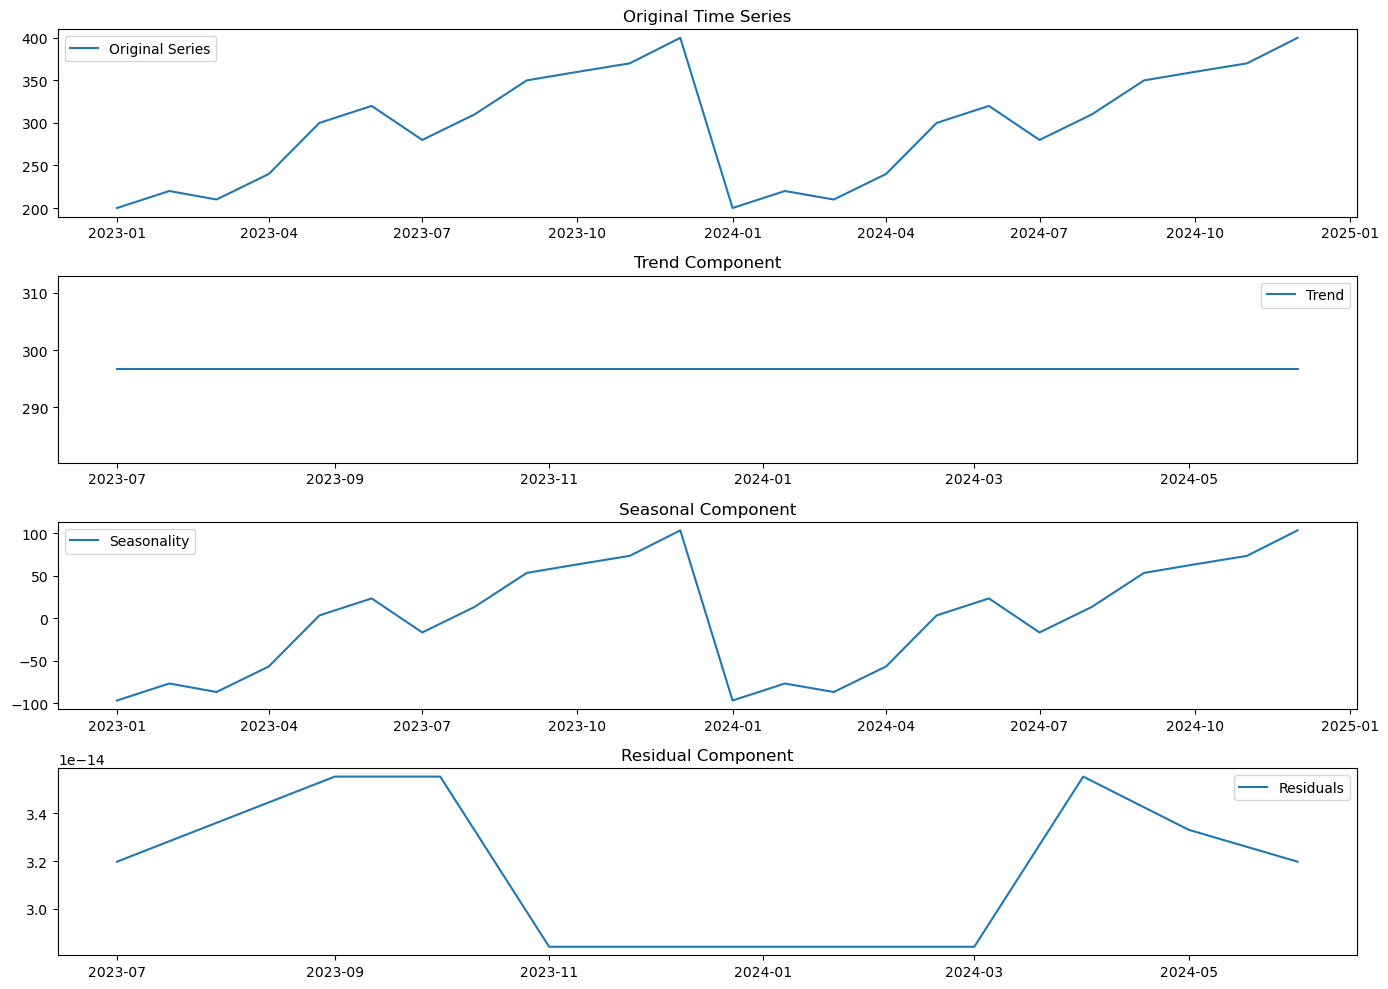

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate example data: Monthly retail sales
data = pd.date_range(start='2023-01-01', periods=24, freq='MS')
sales = [200, 220, 210, 240, 300, 320, 280, 310, 350, 360, 370, 400] * 2
df = pd.DataFrame({'date': data, 'sales': sales})
df.set_index('date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['sales'], model='additive')

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot components
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(df['sales'], label='Original Series')
plt.title('Original Time Series')
plt.legend(loc='best')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.title('Trend Component')
plt.legend(loc='best')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.title('Seasonal Component')
plt.legend(loc='best')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.title('Residual Component')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


# Interpolating Decomposition Result

**Componet analysis**

- **Trend Component** : Reveal the overall direction of the data.For instance a rising trend indicated increasing values over time.
- **Seasonal Component** : Show periodic patterns.Peaks and trough reflect regular seasonal effect such as increased sales during holiday periods.
- **Residuals** : Represents irregular variations or noise large residuals may indicate anomalies or outliers.

**Handling Missing Values in Decomposition** 

**Challenges** : Missing value can skew the result of the decomposition,making it difficult to accurately analyze the component.


- **Strategies** :

- **Interpolation** : Estimate missing values using interpolation technique,such as linear interpolations.
- **Imputation** : Replace the missing values with statistical estimate like mean or median.
- **Exclusion** : In cases of minimal missing data,excluding the missing values might be practical approach.

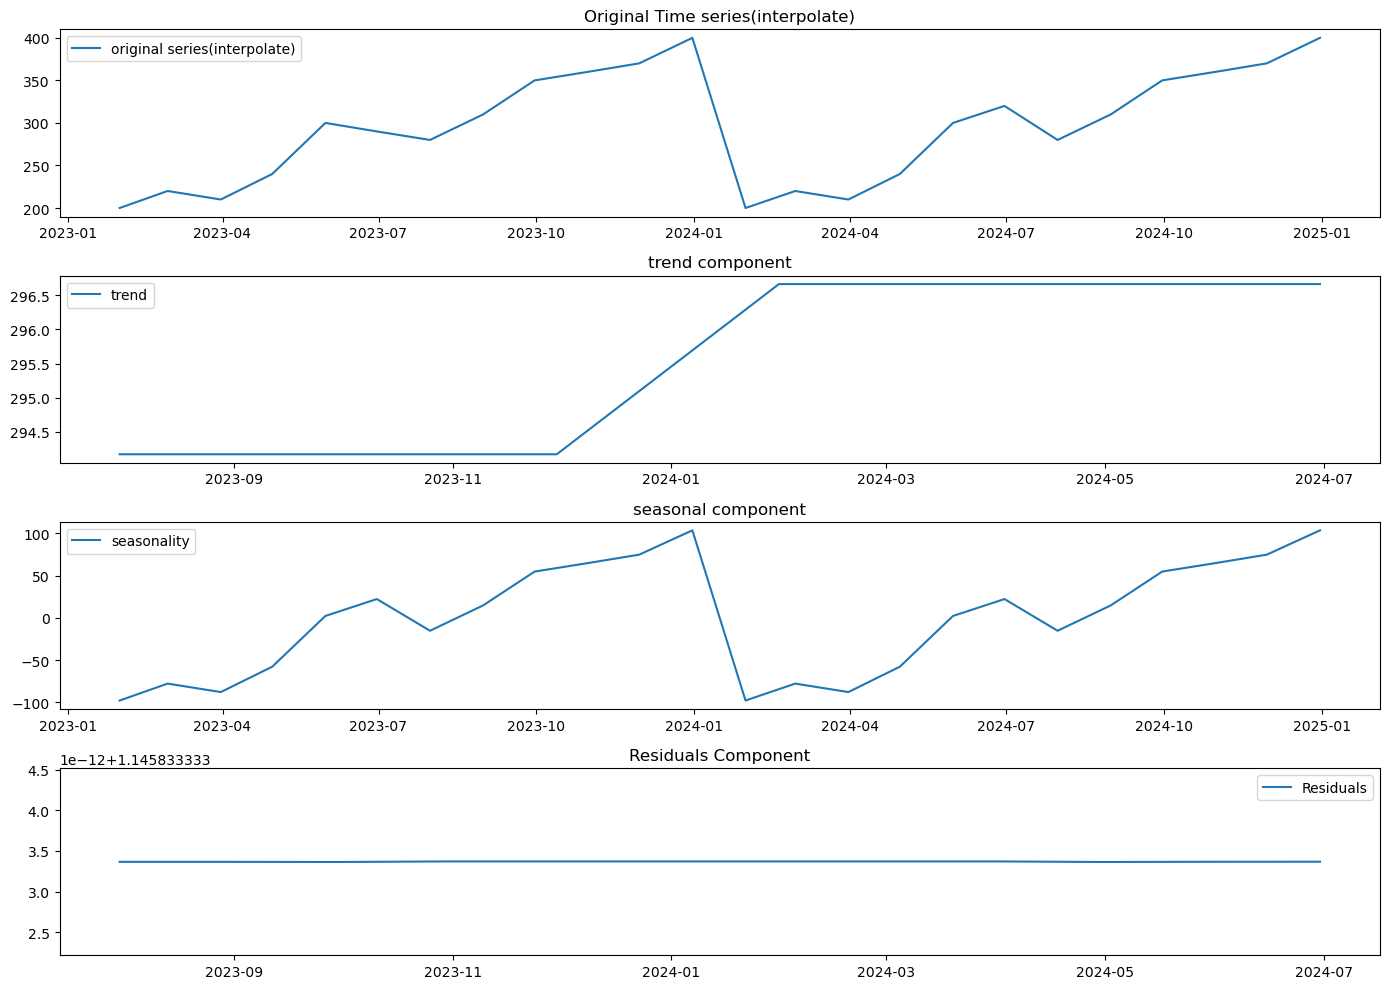

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#Generate example data:Monthly retail sale
data=pd.date_range(start='2023-01-01',periods=24,freq='ME')
sales = [200, 220, 210, 240, 300, 320, 280, 310, 350, 360, 370, 400] * 2
df=pd.DataFrame({'date':data,'sales':sales})
df.set_index('date',inplace=True)
#introducing missing values

df.loc['2023-06-30','sales']=np.nan

#handle missing values using interpolating
df['sales']=df['sales'].interpolate()

#perform the seasonal decomposition

decomposition=seasonal_decompose(df['sales'],model='additive')

#extract and plot components

trend=decomposition.trend
seasonal=decomposition.seasonal
residuals=decomposition.resid

plt.figure(figsize=(14,10))
plt.subplot(4,1,1)
plt.plot(df['sales'],label='original series(interpolate)')
plt.title('Original Time series(interpolate)')
plt.legend(loc='best')

plt.subplot(4,1,2)
plt.plot(trend,label='trend')
plt.title('trend component')
plt.legend(loc='best')

plt.subplot(4,1,3)
plt.plot(seasonal,label='seasonality')
plt.title('seasonal component')
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(residuals,label='Residuals')
plt.title('Residuals Component')
plt.legend(loc='best')

plt.tight_layout()
plt.show()
 